In [26]:
import numpy as np
import pandas as pd
import os
import torch
import fastai
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [27]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
path = Path('./data/faces/')

In [29]:
## Function to filter validation samples
def validation_func(x):
    return 'validation' in x

In [30]:
df = pd.read_csv(path/'../../datasets/labels.csv')
df.head()

,image_name,labels
0,emotionet_5_first_50000_12.jpg,no_wrinkles no_freakles no_glasses gray has_few_hairs
1,emotionet_5_first_50000_60.jpg,no_wrinkles no_freakles no_glasses black has_thick_hair
2,emotionet_5_first_50000_107.jpg,no_wrinkles no_freakles no_glasses blond has_few_hairs
3,emotionet_5_first_50000_159.jpg,no_wrinkles no_freakles no_glasses black bald_or_shaved
4,emotionet_5_first_50000_232.jpg,wrinkles no_freakles normal_glasses black has_few_hairs


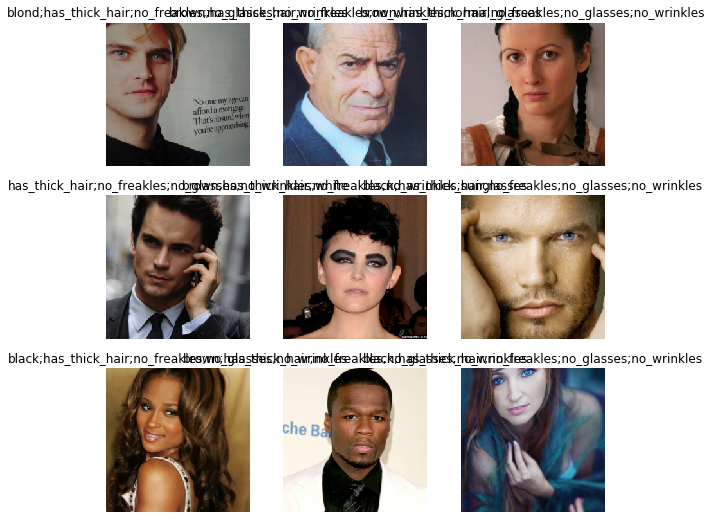

In [32]:
dls = ImageDataLoaders.from_df(df, path, label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224),num_workers=0)
dls.show_batch()

In [36]:
arch = models.resnet50
acc_02 = partial(accuracy_multi, thresh=0.2)
acc_03 = partial(accuracy_multi, thresh=0.3)
acc_04 = partial(accuracy_multi, thresh=0.4)
acc_05 = partial(accuracy_multi, thresh=0.5)
learn = cnn_learner(dls, arch, metrics=[acc_02, acc_03, acc_04, acc_05])
#learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.03981071710586548)

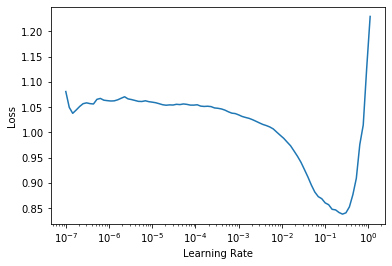

In [37]:
learn.lr_find()

In [38]:
lr = 2e-2
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,time
0,0.948409,0.963619,0.470528,0.514228,0.552168,0.582656,04:46


In [39]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,time
0,0.567915,0.395565,0.794377,0.830962,0.853997,0.861111,04:53
1,0.454931,0.386815,0.860434,0.867886,0.872967,0.874661,04:24
2,0.391503,0.344408,0.837737,0.861450,0.868902,0.877371,04:15
3,0.350169,0.338545,0.843496,0.862466,0.873645,0.878049,04:22


In [40]:
learn.save('ff_stage-1-rn50')

Path('data/faces/models/ff_stage-1-rn50.pth')

In [41]:
learn.unfreeze()

AttributeError: 'Learner' object has no attribute 'plot'

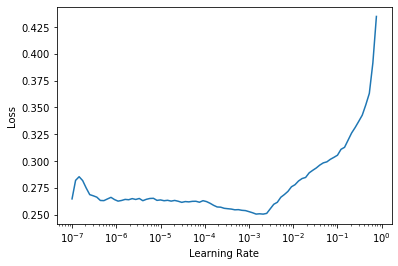

In [42]:
learn.lr_find()

In [43]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,time
0,0.255253,0.331174,0.844851,0.868225,0.875000,0.878726,06:07
1,0.251786,0.335379,0.865176,0.879404,0.884824,0.887873,05:30
2,0.235522,0.352719,0.851287,0.866870,0.876355,0.881098,05:16
3,0.215214,0.359772,0.844851,0.863821,0.869919,0.876355,05:15
4,0.198061,0.360771,0.846545,0.863144,0.870596,0.875678,05:28


In [44]:
learn.save('ff_stage-2-rn50')

Path('data/faces/models/ff_stage-2-rn50.pth')